# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
df_train = pd.read_csv('D:/Belajar Data Science/DeepLearning/Google_Stock_Prediction/Datasets/Google_Stock_Train (2010-2022).csv')
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
1,2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2,2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
3,2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
4,2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028


In [3]:
training_set = df_train.iloc[:,1:2].values
training_set

array([[15.689439],
       [15.695195],
       [15.662162],
       ...,
       [86.980003],
       [86.620003],
       [86.980003]])

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scalled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scalled[i-60:i])
    y_train.append(training_set_scalled[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)


### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [8]:
model = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [9]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

C:\Users\Fatoni Murfid S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

### Adding the output layer

In [11]:
model.add(Dense(units = 1))

### Compiling the RNN

In [12]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [13]:
from keras.callbacks import EarlyStopping

# Definisikan callback EarlyStopping
early_stopping_callback = EarlyStopping(monitor='loss', patience=10, mode='min', verbose=1)

# Melatih model dengan callback EarlyStopping
model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[early_stopping_callback])


Epoch 1/100


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0013
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.8192e-05
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 8.5937e-05
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 5.9953e-05
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 5.8364e-05
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.5320e-05
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.8777e-05
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.3980e-05
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 5.6675e-05
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 4.1647e-05
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 3.8725e-05
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 5.4113e-05
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4.0979e-05
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 4.1011e-05
Epoch 15/100
38/3

### Saving the model

In [14]:
# model.save('model_stock_prediction_v1.h5')

# model_json = model.to_json()
# with open("model_architecture_v1.json", "w") as json_file:
#     json_file.write(model_json)
    

# # from tensorflow.keras.models import load_model

# # # Memuat seluruh model
# # loaded_model = load_model('model_stock_prediction.h5')

In [25]:
from joblib import dump
dump(sc, 'scaler.joblib')

['scaler.joblib']

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [15]:
df_test = pd.read_csv('D:/Belajar Data Science/DeepLearning/Google_Stock_Prediction/Datasets/Google_Stock_Test (2023).csv')
real_stock_price = df_test.iloc[:,1:2].values


In [16]:
import pandas as pd

# Assuming real_stock_dates is obtained as described
real_stock_dates = df_test.iloc[:, 0:1].values

# Convert real_stock_dates to a DataFrame and flatten the values
real_stock_dates_df = pd.DataFrame(real_stock_dates.flatten().tolist())

# Print the DataFrame
real_stock_dates_df.to_string(index=False)
real_stock_dates = pd.to_datetime(real_stock_dates_df[0]).dt.strftime('%Y-%m-%d')
print(real_stock_dates)


0      2023-01-03
1      2023-01-04
2      2023-01-05
3      2023-01-06
4      2023-01-09
          ...    
138    2023-07-24
139    2023-07-25
140    2023-07-26
141    2023-07-27
142    2023-07-28
Name: 0, Length: 143, dtype: object


### Getting the predicted stock price of 2023

In [26]:
df_total = pd.concat((df_train['Open'], df_test['Open']), axis = 0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


### Visualising the results

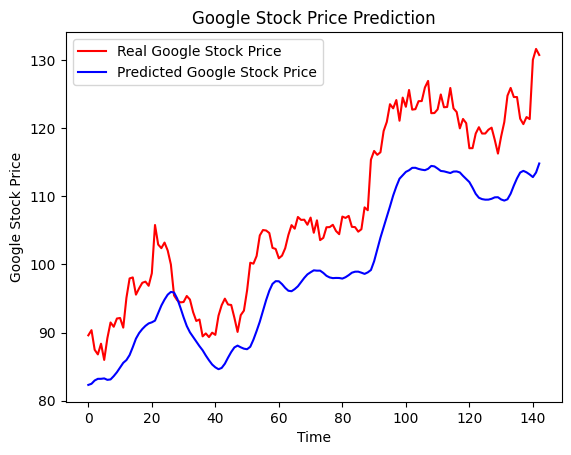

In [27]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [28]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

9.000927340924019


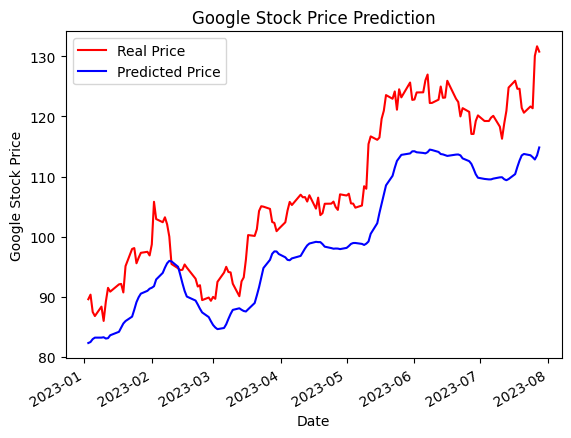

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert real_stock_dates to datetime format
real_stock_dates = pd.to_datetime(real_stock_dates)

# Flatten real_stock_price and predicted_stock_price arrays
real_stock_price = real_stock_price.flatten()
predicted_stock_price = predicted_stock_price.flatten()

# Create a DataFrame with dates as the index
combined_data = pd.DataFrame({'Real Price': real_stock_price, 'Predicted Price': predicted_stock_price}, index=real_stock_dates)

# Plot actual and predicted stock prices
combined_data.plot(color=['red', 'blue'])

# Set title and axis labels
plt.title('Google Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Google Stock Price')

# Show legend
plt.legend()

# Show the plot
plt.show()
